# This is a mobile price range classifier project which is a part of *mentorness* internship program for machine learning 

-----------------------------------------------------------------------------

A special thanks for [Mentorness](https://www.linkedin.com/company/mentorness/) for providing this opportunity and experiences that come with it !



**Problem Statement**:

>The task is to build a predictive model that can accurately classify mobile phones into predefined price
ranges based on various attributes such as battery power, camera features, memory, connectivity options,
and more. The dataset provided contains information about several mobile phones, including their
specifications and corresponding price ranges.

**Dataset Description**:

>The dataset comprises the following columns:

> battery_power: Total energy a battery can store in mAh.

> blue: Bluetooth enabled (1 if yes, 0 if no).

> clock_speed: Speed at which microprocessor executes instructions.

> dual_sim: Dual SIM support (1 if yes, 0 if no).

> fc: Front Camera mega pixels.

> four_g: 4G network support (1 if yes, 0 if no).

> int_memory: Internal Memory (in gigabytes).

> m_dep: Mobile Depth in cm.

> mobile_wt: Weight of mobile phone.

> n_cores: Number of cores of the processor.

> pc: Primary Camera mega pixels.

> px_height: Pixel Resolution Height.

> px_width: Pixel Resolution Width.

> ram: Random Access Memory in megabytes.

> sc_h: Screen Height of mobile in cm.

> sc_w: Screen Width of mobile in cm.

> talk_time: Longest time that a single battery charge will last when you are talking.

> three_g: 3G network support (1 if yes, 0 if no).

> touch_screen: Touch screen support (1 if yes, 0 if no).

> wifi: Wifi connectivity (1 if yes, 0 if no).

> price_range: Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 -
very high cost).

<div class="alert alert-block alert-info">
<b>Objectives:</b>
<ol>
    <li>Exploration and Data Cleaning</li>
    <li>EDA for insights, relationships, and associations</li>
    <li>Selection of a suitable classification machine learning algorithm + performance evaluation</li>
    <li>Fine tuning the model for accuracy improvement</li>
    <li>Final Model Validation</li>
</ol>
<b>Deliverables:</b>
<ul>
    <li>Jupyter Notebook or Python script containing the code implementation.</li>
    <li>Documentation detailing the step-by-step process, including data preprocessing, model selection, evaluation metrics, and results interpretation.</li>
    <li>Visualization of key findings from EDA.</li>
    <li>Trained machine learning model for mobile price classification.</li>
    <li>Deployment instructions (if applicable).</li>
</ul>
</div>


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [81]:
mobiles_train = pd.read_csv("train.csv")
mobiles_test_against = pd.read_csv("test.csv")

In [82]:
mobiles_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [83]:
mobiles_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [84]:
mobiles_test_against.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

### We can observe that ``blue``,``dual_sim``,``four_G``,``three_g``,``wifi``, and ``price_range``, have been identifies as int by pandas while they represent binary categorical data, thus the conversion to categorical type.

In [85]:
mobiles_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']] = mobiles_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']].astype('category')
mobiles_test_against[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = mobiles_test_against[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('category')

In [86]:
mobiles_train.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object

In [87]:
mobiles_test_against.dtypes

id                  int64
battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
dtype: object

### It has been observed from the info output that there should be no null value in the ``mobiles`` set

In [88]:
mobiles_train.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [89]:
mobiles_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [90]:
# mobiles_train.unique()

In [91]:
mobiles_train.price_range.value_counts()

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

#### Since the ``price_range`` is an ordinal categorical variable represented as numbers I will let it be as is.

In [92]:
# columns = ['battery_power','clock_speed','fc',
#        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

num_columns = mobiles_train.select_dtypes(include=['int64', 'float64']).columns

<Figure size 2000x2000 with 0 Axes>

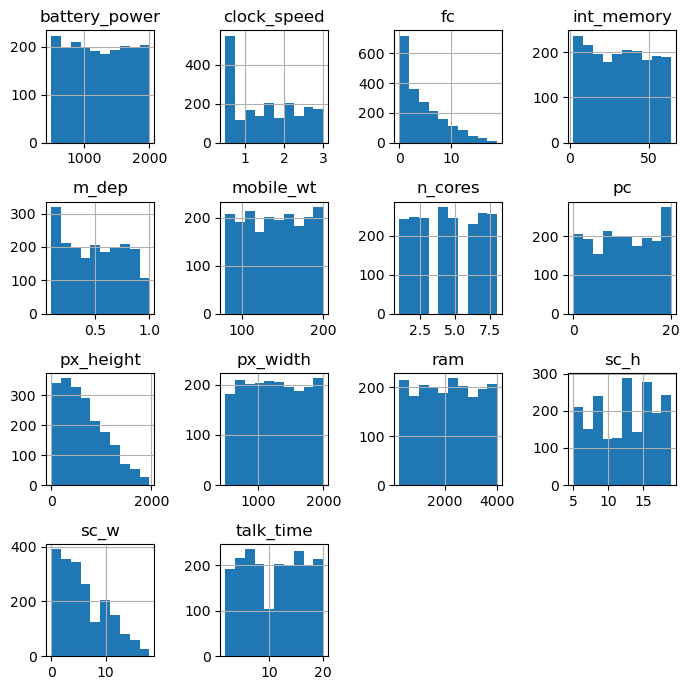

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure(figsize=(20, 20))
mobiles_train[num_columns].hist(figsize=(7,7))
plt.tight_layout()
plt.show()
plt.clf()

## Histogram Interpretation

The histograms reveal various distribution shapes for the mobile phone features:

- **Approximately Uniform Distributions**:
  - `battery_power`, `ram`, `int_memory`, `px_width`, `mobile_wt`: These features show a fairly even spread across their ranges, suggesting a lack of prominent clusters or typical values.

- **Right-Skewed Distributions**:
  - `fc` (Front Camera megapixels), `sc_w` (Screen Width), `px_height` (Pixel Height): These variables have a higher concentration of observations towards the lower end of their value ranges, with the data tailing off as the values increase.

- **Multimodal Distributions**:
  - Certain variables, notably `n_cores`, display multiple peaks in their histograms, indicating the existence of popular clusters. These could reflect preferred configurations or industry standards within mobile phone specifications.


### Checking for outliers

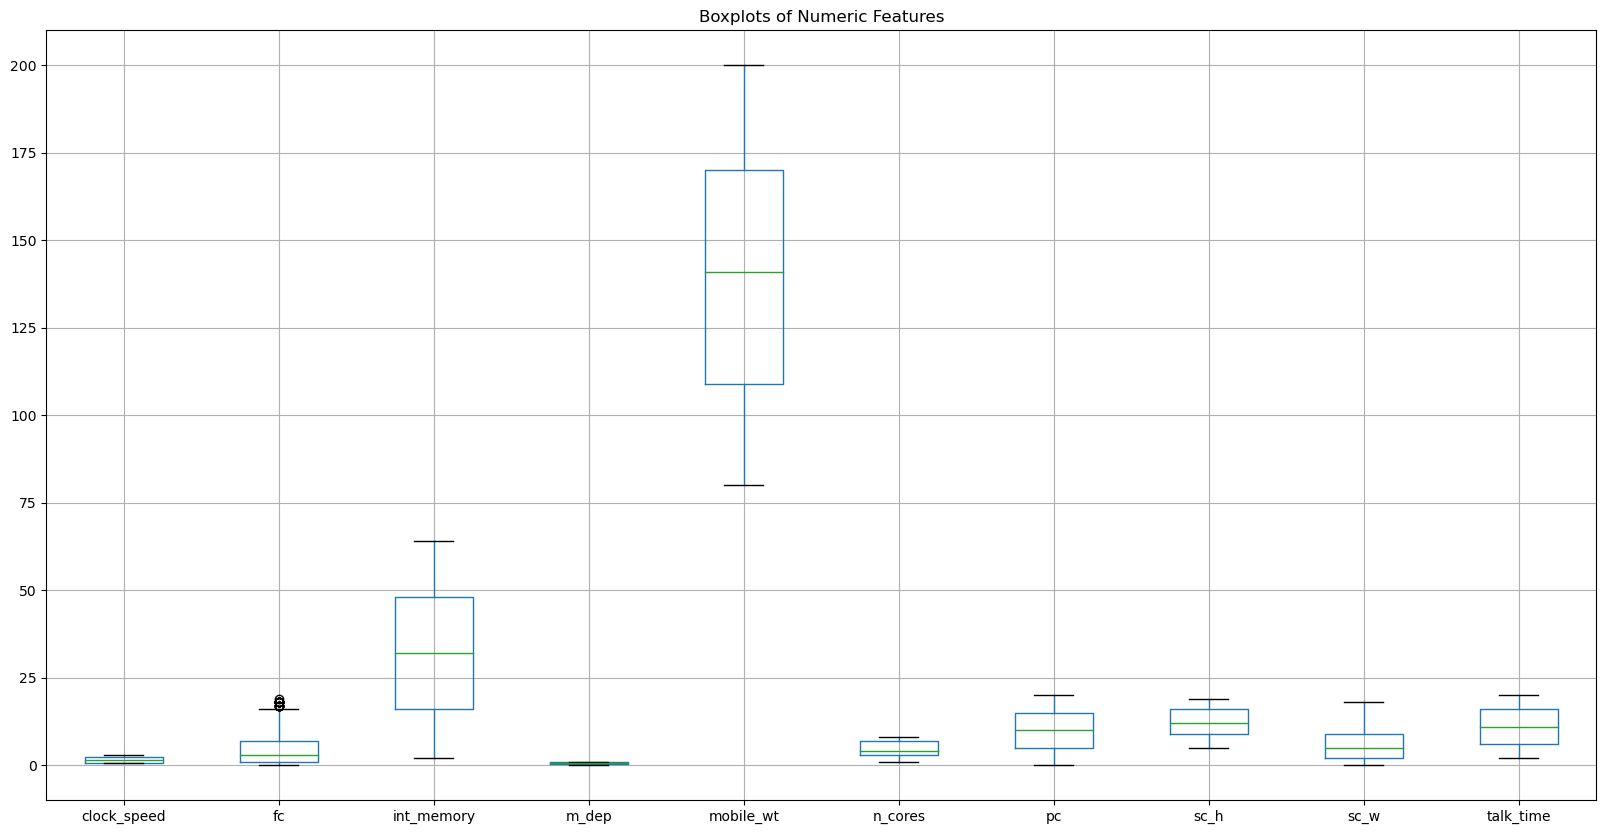

In [94]:
exclude_columns = ['battery_power', 'px_height', 'px_width', 'ram']
include_columns = [col for col in num_columns if col not in exclude_columns]
plt.figure(figsize=(20,10)) 
mobiles_train[include_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()

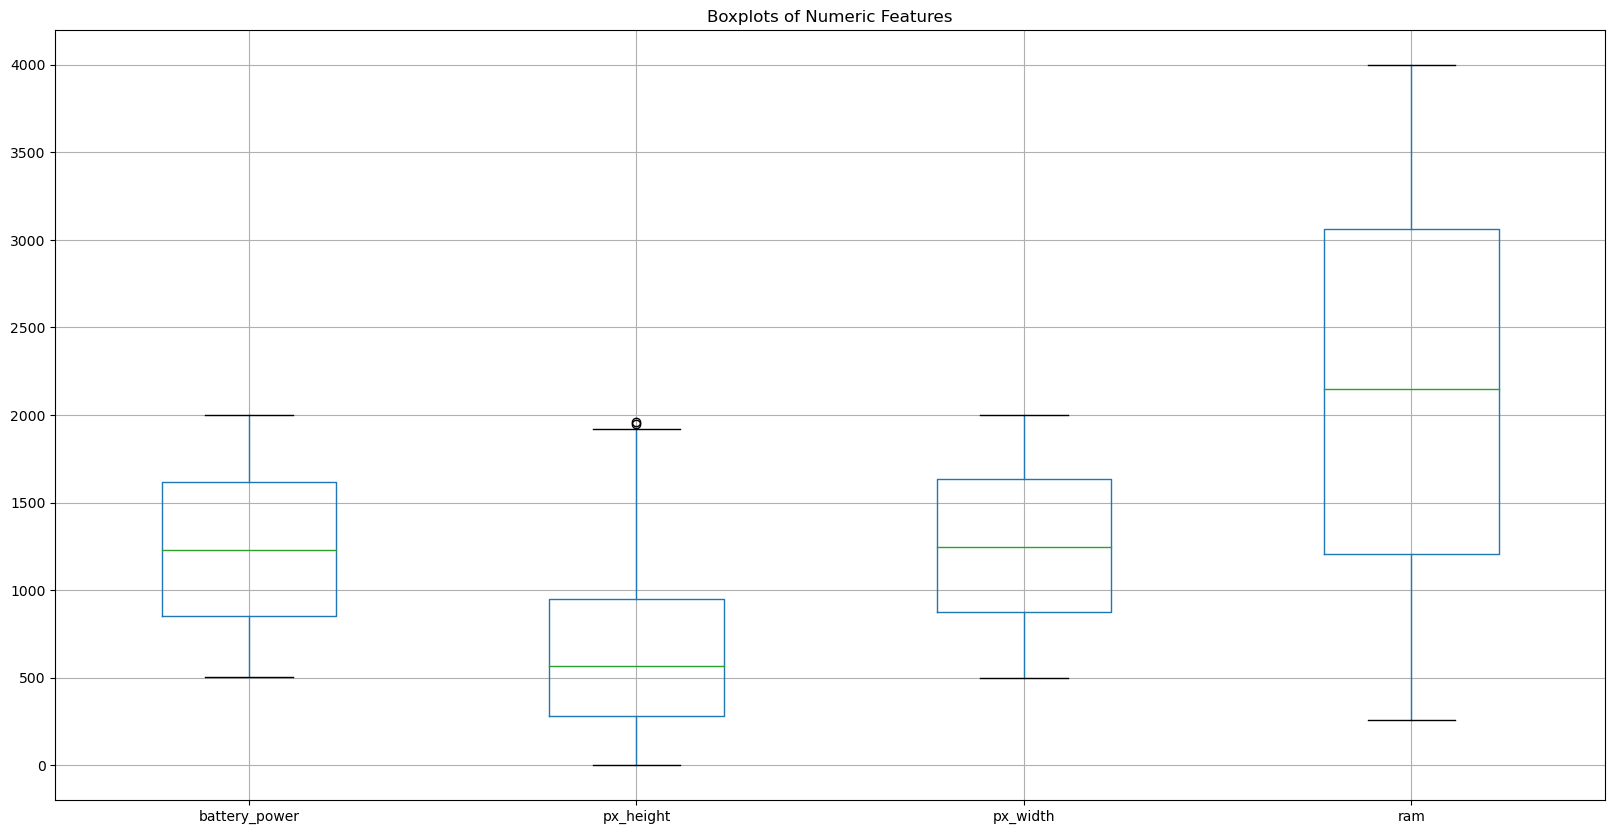

In [95]:
plt.figure(figsize=(20,10)) 
mobiles_train[exclude_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()

``fc``, ``px_height`` are columns who seem to have outliers as they are denoted by the circle shape.
There is a difference in scaling between the excluded columns and the rest, hence the decision to include two plots here. (Indicating the need for scaling later on).

## Exploratory Data Analysis

### How are numercial attributes correlated with each other and the target variable?

In [96]:
mobiles = mobiles_train.copy() # A copy to make sure that I can revert back to the originl set if needed
corr_matrix = mobiles.corr()
corr_matrix['price_range'].sort_values(ascending=False)


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [97]:
corr_matrix_spearman = mobiles.corr(method='spearman')
corr_matrix_spearman['price_range'].sort_values(ascending=False)


price_range      1.000000
ram              0.917080
battery_power    0.199991
px_width         0.165134
px_height        0.131884
int_memory       0.044278
pc               0.032824
sc_w             0.024776
fc               0.024167
sc_h             0.023727
three_g          0.023611
talk_time        0.022138
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004651
m_dep           -0.000322
clock_speed     -0.005436
mobile_wt       -0.030214
touch_screen    -0.030411
Name: price_range, dtype: float64

<div style="background-color: #e7f3fe; border-left: 6px solid #2196F3; padding: 0.5em;">
  <strong>Interpretation of Correlation with Ordinal Categorical Data</strong>
  <p>When dealing with the <code>price_range</code> variable, it is essential to recognize that it is categorically ordinal. The numerical encoding does not imply it is continuous or interval. Although this allows the calculation of correlation coefficients with other numerical variables, interpretations require caution.</p>
  <ul>
    <li><strong>Pearson's Correlation:</strong> Assumes continuous variables and normally distributed data. It is less robust for ordinal data despite being computable.</li>
    <li><strong>Spearman's Rank Correlation:</strong> A non-parametric measure appropriate for ordinal data. It evaluates monotonic relationships based on rank, not value.</li>
    <li><strong>Extra: Kendall's Tau:</strong> A non-parametric measure like Spearman's but based on concordant and discordant pairs. Suitable for ordinal data.</li>
  </ul>
  <p>Both Spearman's and Pearson's methods were applied, yielding similar results. This similarity may hint at linear relationships. However, for ordinal data such as <code>price_range</code>, Spearman's rank correlation coefficient provides a more accurate interpretation, highlighting monotonic relationships.</p>
</div>


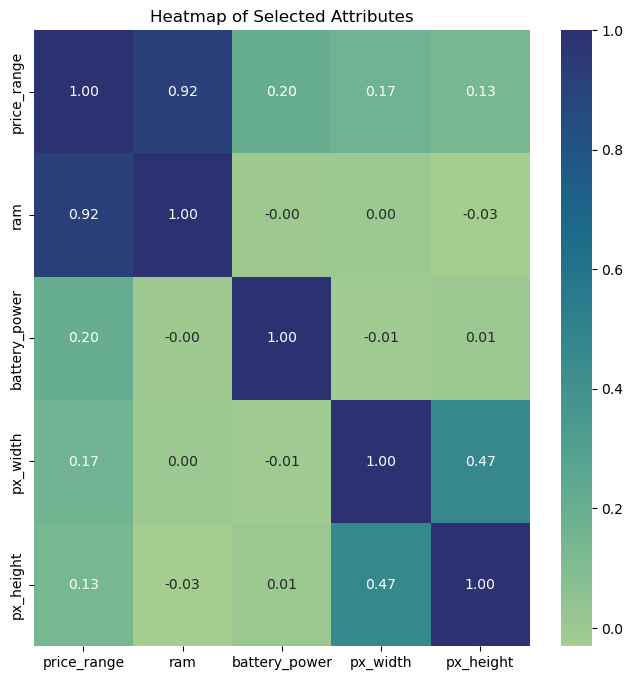

In [98]:
# Visualizing a heatmap for the correlations (1st case: specific attributes)
attr = ["price_range","ram","battery_power","px_width","px_height"] 

filtered_corr_matrix = corr_matrix_spearman.loc[attr, attr]

plt.figure(figsize=(8, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap of Selected Attributes')
plt.show()

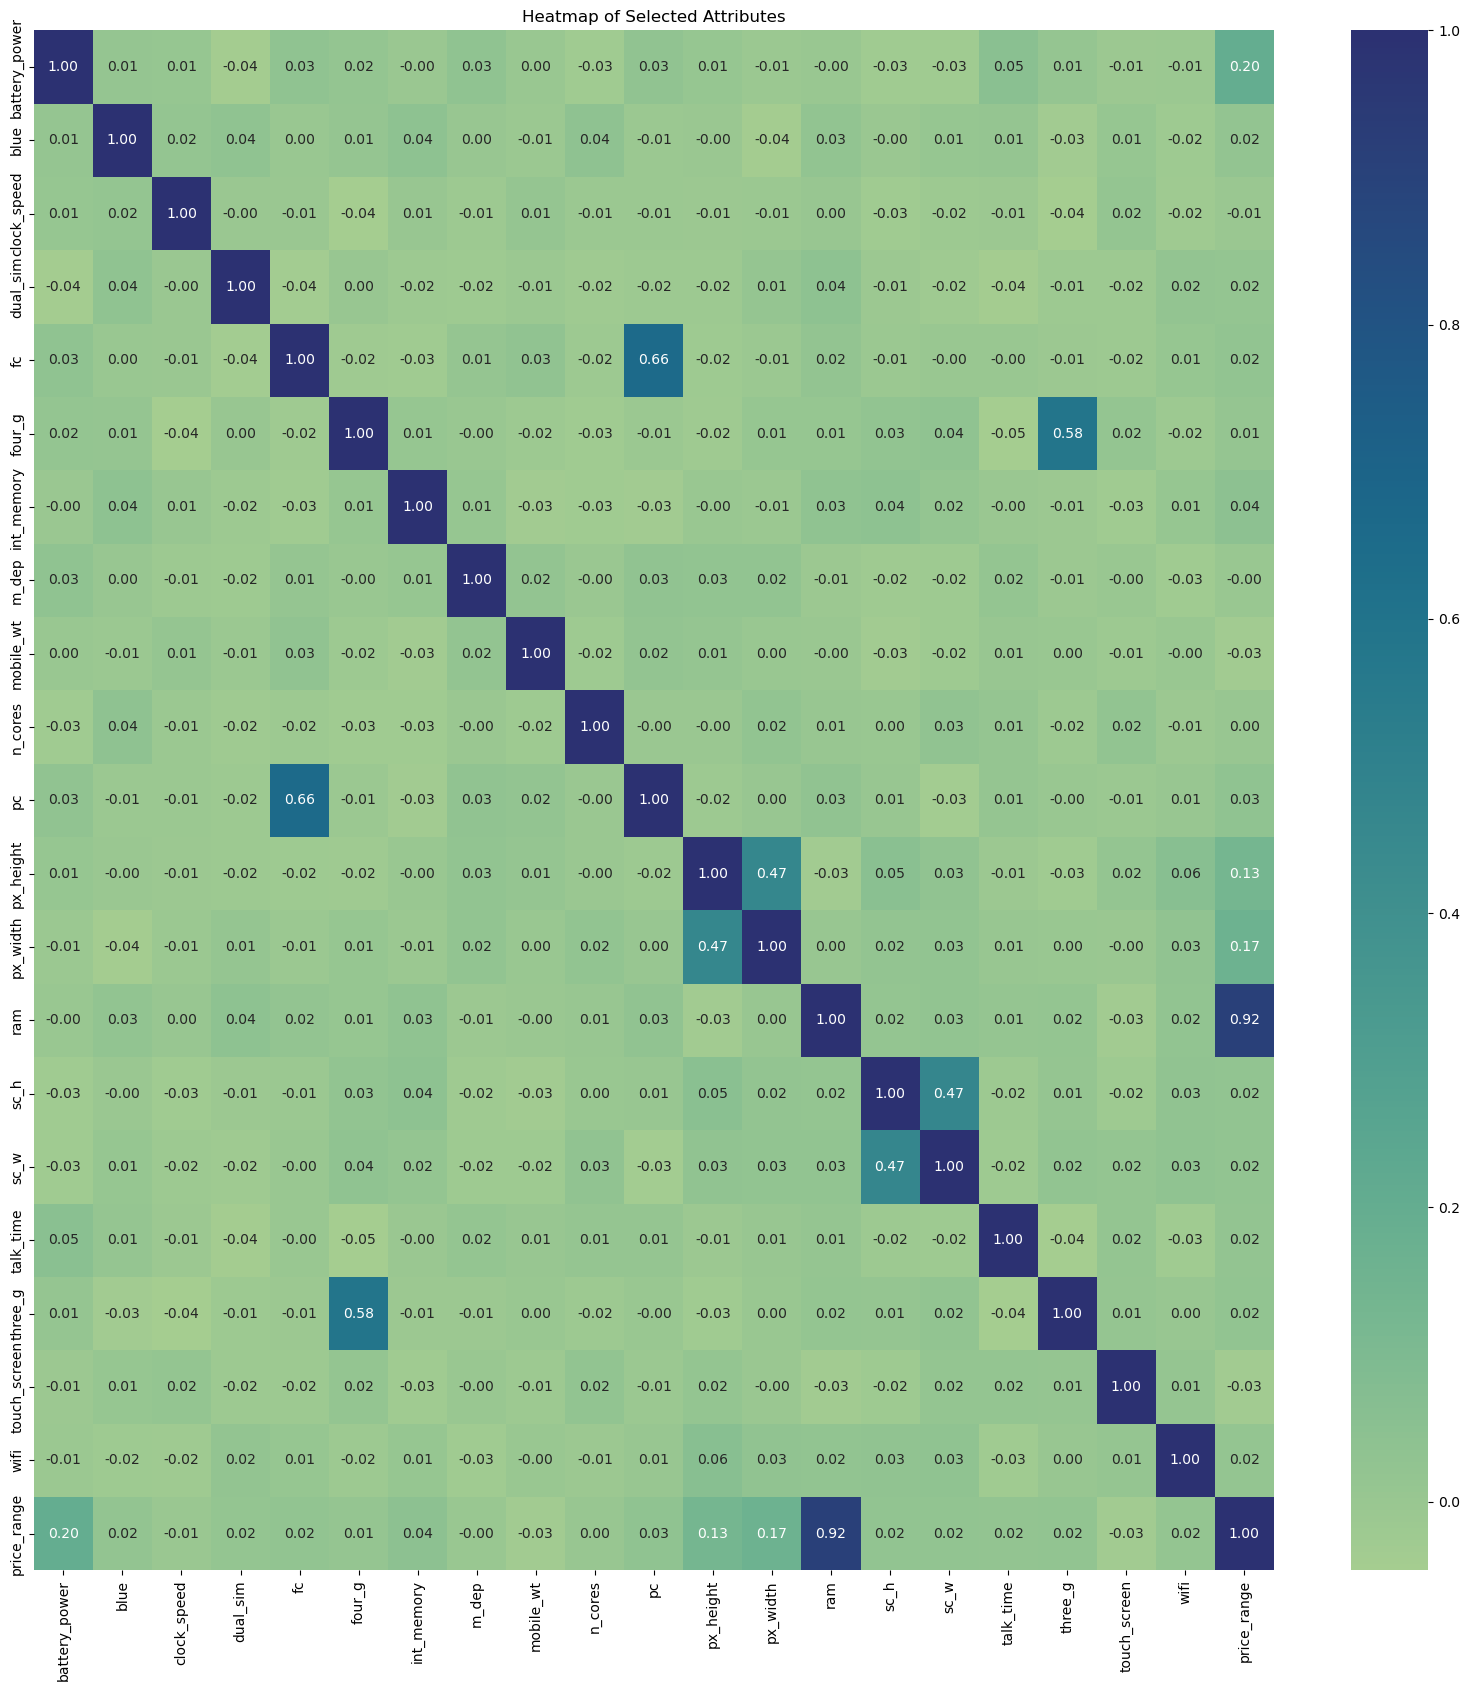

In [99]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap of Selected Attributes')
plt.show()

### The heatmap showcases that previously explored correlation factors with ``price_range`` target variable, but another aspect is inspecting the correlation between the numerical values.

> Highly correlated variables (e.g >=0.7) in many cases include redunduncy in the model so it is recommended to, if the case is present, exclude one of the two variables which is not the case here.  

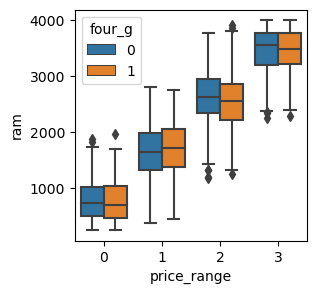

<Figure size 640x480 with 0 Axes>

In [100]:
# An interesting combination as the ram variable is the highest correlated value with the price_range
# You could explore how the average values of rams differ between different price range 
#(in this case for example a multivariate analysis is done with a hue --> does the phone support 4g or not)
plt.figure(figsize=(3,3))
sns.boxplot(y='ram',x='price_range',hue='four_g',data=mobiles,orient='v')
plt.show()
plt.clf()

### For the box plot above, you could see some small differences between the average ram size for mobile that support 4g and those that do not.
### However it is obvious for example that when moving up through the different price ranges (low ---> high), regardless of the fact that the mobile's 4g support status, the ram size increases dramatically.

### Checking Associations
<div class="alert alert-block alert-info">
<b>Association:</b>
<ol>
  <li>When testing the association between numerical variables and a non-binary categorical target variable, an ANOVA test is used to determine if there are statistically significant differences among the group means of the categorical variable.</li>
  <li>If the ANOVA test indicates significance, implying that at least one group mean differs, Tukey’s HSD test is then conducted to identify which specific group means differ from each other.</li>
</ol>
<b>Another Approach:</b>
<ul>
  <li>Visualizing the relationship using pair plots to observe potential patterns or group differences in the data visually.</li>
</ul>
</div>


> **A Basic Null Hypothesis (ANOVA):**
    - All group means are the same across the different categories of the target variable.

> **A Basic Alternative Hypothesis (ANOVA):**
    - Not all group means are the same across the different categories of the target variable.


------------------------------------
(Another explanation from [GeeksForGeeks](https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/))Hypothesis involved:
A one-way ANOVA has the below given null and alternative hypotheses:

>H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal).

>H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest.

In [101]:
num_columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [114]:
def run_anova(df,target): # target is a categorical variable (non-binary)
    anova_results = {}

    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


    for feature in numeric_columns:
        groups = [df[df[target] == i][feature] for i in range(4)]  # Adjust range if different price ranges 0,1,2,3
        f_statistic, p_value = stats.f_oneway(*groups)
        anova_results[feature] = {'p-value': p_value}
    return anova_results


anova_results = run_anova(mobiles,'price_range')
anova_results

{'battery_power': {'p-value': 5.948688277085545e-20},
 'clock_speed': {'p-value': 0.6866751621401248},
 'fc': {'p-value': 0.5095041590900421},
 'int_memory': {'p-value': 0.03277693883277447},
 'm_dep': {'p-value': 0.21245949273717601},
 'mobile_wt': {'p-value': 0.013117390712873744},
 'n_cores': {'p-value': 0.04893585053336053},
 'pc': {'p-value': 0.4797489023362932},
 'px_height': {'p-value': 1.8860848027538453e-12},
 'px_width': {'p-value': 2.1169108878354858e-14},
 'ram': {'p-value': 0.0},
 'sc_h': {'p-value': 0.0832499108428466},
 'sc_w': {'p-value': 0.17121457684207045},
 'talk_time': {'p-value': 0.18066864736912272}}

## ANOVA Results Summary

### For context: each variable is tested against the target variable individually, the results have been combined into one dictionary only for presentation.

The ANOVA tests conducted on various features against the `price_range` have yielded the following insights:

### Features with Statistically Significant Differences:

- `battery_power`
- `int_memory`
- `mobile_wt`
- `n_cores`
- `px_height`
- `px_width`
- `ram`

These features have p-values less than the significance threshold of 0.05, indicating significant differences in their means across different price ranges. This suggests that these characteristics, such as `battery_power` and `ram`, likely play a role in determining a mobile phone's price category.

### Features Without Statistically Significant Differences:

- `clock_speed`
- `fc`
- `pc`
- `sc_h`
- `sc_w`
- `talk_time`

For these features, the ANOVA tests returned p-values greater than 0.05, which implies that there is insufficient evidence to claim significant mean differences across the price categories. While they may not have a notable impact individually, their influence in combination with other features or in different contexts cannot be entirely ruled out.

### Interpretation and Model Implications:

The statistically significant features will be prioritized in the modeling phase as potential predictors. Those without significant differences might be considered for exclusion or further analysis in conjunction with other variables to understand their impact fully.

Documentation of these results is crucial, as it substantiates the decisions made in feature selection and provides a basis for the modeling strategy moving forward.


## Future Statistical Considerations

While the ANOVA tests conducted have provided substantial insights, indicating significant differences in features like `ram` across different price ranges, further post-hoc analysis could offer more nuanced understanding. A recommended future analysis is Tukey's Honestly Significant Difference (HSD) test, which can determine exactly which groups' means (i.e., which price ranges) differ from each other.

### Example Case for `ram`:
The ANOVA results for `ram` suggest that there are significant differences in RAM capacity between the various price ranges of mobile phones. In future analysis, conducting Tukey's HSD test could allow us to pinpoint specific price range comparisons—such as whether the mean RAM differs between 'low cost' and 'medium cost' phones or is more pronounced between 'high cost' and 'very high cost' phones. Such detailed insights could be instrumental in guiding targeted marketing strategies and product feature enhancements.

### Incorporating Tukey's HSD Test:
Incorporating Tukey's HSD test as part of the EDA in future projects will complement the preliminary findings from ANOVA, providing a comprehensive view of how individual features influence price range classifications.

This proposed extension to the analysis would be an excellent way to further validate and interpret the significance of features that influence mobile phone pricing, ensuring that our predictive models are both robust and interpretable.


### How do ``categorical variables`` relate to our target variable ?
<div class="alert alert-block alert-info">
<b>Association:</b>
<ol>
  When testing association to understand significance between categorical variables a chi-square test
</ol>
<b>Simpler approach:</b>
<ul>
  Visualizing the relationship (frequency and proportions here for categorical variables) is a simpler approach to understanding relationships
</ul>
</div>

> A basic null hypothesis :
    There is no significant assocciation between each categorical variable and the traget variable
    
> A basic alternative hypothesis:
    There is a significant assocciation between each categorical variable and the traget variable

In [103]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
# num_columns has been defined before for the numerical variables

In [104]:
def run_chi_square(df,target):
    results = []
    features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
    for f in features:
        contingency_table = pd.crosstab(df[f],df[target]) # cross tabulation(aka table of frequncies)
        chi2,pval,dof,expected = stats.chi2_contingency(contingency_table)
        results.append({'Feature': f, 'Chi-square Statistic': chi2, 'p-value': pval, 'Degrees of Freedom': dof})
    return pd.DataFrame(results)

chi2 = run_chi_square(mobiles,'price_range')
print(chi2)
        

        Feature  Chi-square Statistic   p-value  Degrees of Freedom
0          blue              1.432143  0.698018                   3
1      dual_sim              1.286464  0.732350                   3
2        four_g              3.179880  0.364714                   3
3       three_g              1.373764  0.711696                   3
4  touch_screen              3.880140  0.274701                   3
5          wifi              0.856168  0.835991                   3


## Chi-Square Test Summary for Categorical Features

The Chi-square tests were performed to evaluate the association between each categorical feature and the `price_range` target variable. The following table summarizes the Chi-square statistics and p-values obtained:

| Feature       | Chi-square Statistic | p-value | Degrees of Freedom |
|---------------|----------------------|---------|--------------------|
| blue          | 1.432143             | 0.698018| 3                  |
| dual_sim      | 1.286464             | 0.732350| 3                  |
| four_g        | 3.179880             | 0.364714| 3                  |
| three_g       | 1.373764             | 0.711696| 3                  |
| touch_screen  | 3.880140             | 0.274701| 3                  |
| wifi          | 0.856168             | 0.835991| 3                  |

All p-values are greater than the significance threshold of 0.05, leading us to conclude that there is no statistically significant association between these categorical features (blue, dual_sim, four_g, three_g, touch_screen, wifi) and the target variable `price_range`. This means we fail to reject the null hypothesis for each feature tested.

### Null Hypothesis (H0)
The null hypothesis for a Chi-square test of independence states that there is no association between the variables. It suggests that any observed differences are due to random chance, implying that the categorical features are independent of the price range.

Given these results, these particular categorical features may not be predictive of the `price_range` on their own. Further analysis might involve interaction terms or considering these features in the context of other variables.


## Model Selection, Evaluation, and testing

In [105]:
# For this initial part all features will be used, the next part will check how using highly correlated, significantly associated 
# or features I see as important affect the performance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score  # using cross evaluation
from sklearn.preprocessing import StandardScaler # Z-score scaling to reduce the effects of outliers

# Load your dataset (all features)
X = mobiles.drop('price_range', axis=1)
y = mobiles['price_range']

# It's a good practice to scale features when using KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # 5 folds
    results[name] = cv_scores
    print(f"{name} Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")



KNN Accuracy: 0.47 (+/- 0.03)
Logistic Regression Accuracy: 0.95 (+/- 0.02)
Decision Tree Accuracy: 0.83 (+/- 0.04)
Random Forest Accuracy: 0.87 (+/- 0.03)


### The Logistic Regression classification model has the highest average accuracy ``0.95`` with a standard deviation of ``+/- 0.02`` around the average.
> The model will be evaluated using `` accuracy_score, recall_score, precision_score, f1_score, roc_auc_score `` from sklearn.metrics and a confusion matrix will be visualized

> The model's accuracy is very high, hence the fear of overfitting ----> Should be cleared during testing 

In [106]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report,confusion_matrix

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}") #:.2f adjusts the format to have 2 decimal numbers after the dot
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report for a detailed breakdown
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optionally, compute ROC-AUC for multi-class classification
# Note: ROC-AUC calculation needs probabilities and a binarized version of labels if more than two classes
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')  # One-vs-Rest approach
print(f"ROC-AUC Score: {roc_auc:.2f}")


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

ROC-AUC Score: 1.00


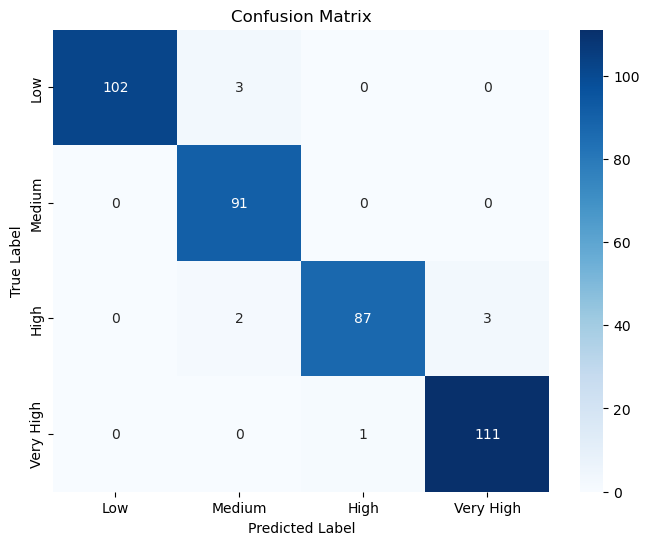

In [107]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
 # Just for more understanding the numbers have been mapped to text
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High', 'Very High'],
            yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

explain the contents and interpretation of the evaluation metrics + the confusion matrix

In [108]:
mobiles.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [109]:
mobiles_test  = mobiles_test_against.copy()
mobiles_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [110]:
all_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                     'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                     'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                     'touch_screen', 'wifi'] # Columns that match that of the training set 

X_test = mobiles_test[all_features]


X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to test data using the scaler object that fit the training set

# Predict using the trained model
y_pred = model.predict(X_test_scaled)


mobiles_test['predicted_price_range'] = y_pred

mobiles_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


<div style="background-color: #FFA500; color: black; padding: 10px;">
<b>Note:</b> Since the test set does not include the 'price_range' variable, we cannot directly measure the accuracy of our model's predictions on this data. As an alternative validation method, we can utilize the K-Nearest Neighbors (KNN) algorithm to identify similar observations within the training set for each instance in the test set. This approach allows us to compare the predicted 'price_range' for test instances against the actual 'price_range' of their closest neighbors in the training set. By examining these comparisons, we can gain insights into the reliability of our predictions and check for potential overfitting. This method does not confirm accuracy in a traditional sense but can provide a qualitative measure of confidence in the model's performance.
</div>
